In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from datetime import datetime
from datetime import date

**Data Preparation**

In [2]:
data = pd.read_csv("netflix_titles.csv")
data.shape

(7787, 12)

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
data['director'].fillna("No Director", inplace=True)
data['cast'].fillna("No Cast", inplace=True)
data['country'].fillna("Country Unavailable", inplace=True)
data.dropna(subset=["date_added", "rating"], inplace=True)

In [6]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Task1**

In [9]:
data['season_count'] = data.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", 
                                  axis = 1)

In [10]:
movie=data[data['type']=='Movie']
show=data[data['type']=='TV Show']

Text(0, 0.5, 'Releases Count')

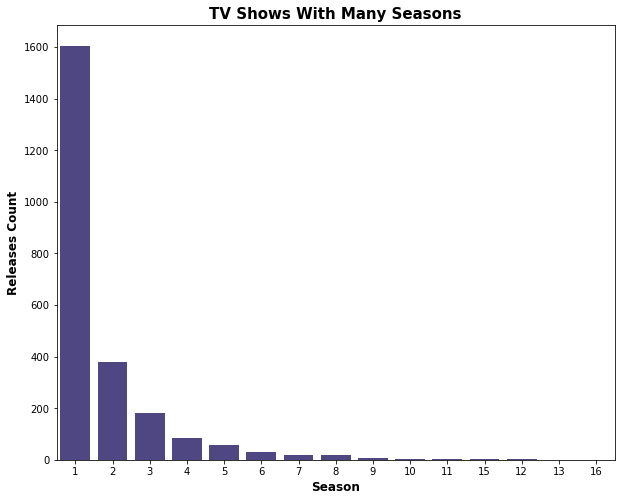

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x=show['season_count'].value_counts().index, y=show['season_count'].value_counts().values, color='#483D8B')
plt.title('TV Shows With Many Seasons',fontsize=15, fontweight='bold')
plt.xlabel('Season', fontsize=12, fontweight='bold')
plt.ylabel('Releases Count', fontsize=12, fontweight='bold')

[None, None, None, None]

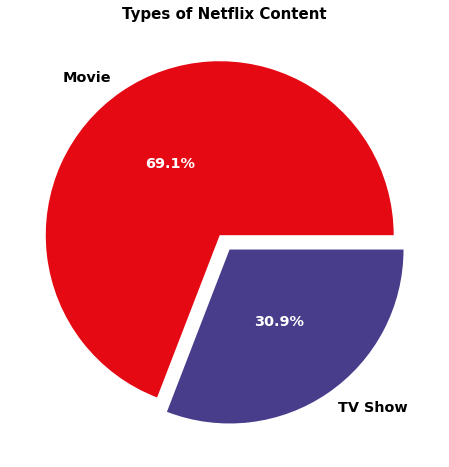

In [12]:
plt.figure(figsize=(10,8))
patches, texts, pcts=plt.pie(x=data['type'].value_counts().values, autopct="%.1f%%", explode=[0.05]*2, 
                             labels=data['type'].value_counts().index, pctdistance=0.5, colors=['#e50914','#483D8B'], 
                             textprops={'size': 'x-large'})
plt.title('Types of Netflix Content',fontsize=15, fontweight='bold')
plt.setp(texts, fontweight='bold')
plt.setp(pcts, color='white', fontweight='bold')

**Task2**

In [13]:
f = movie.set_index('rating').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='genre')
dramas=f[f['genre']=='Dramas']
horror=f[f['genre']=='Horror Movies']
international=f[f['genre']=='International Movies']

Text(0.5, 0, 'Rating')

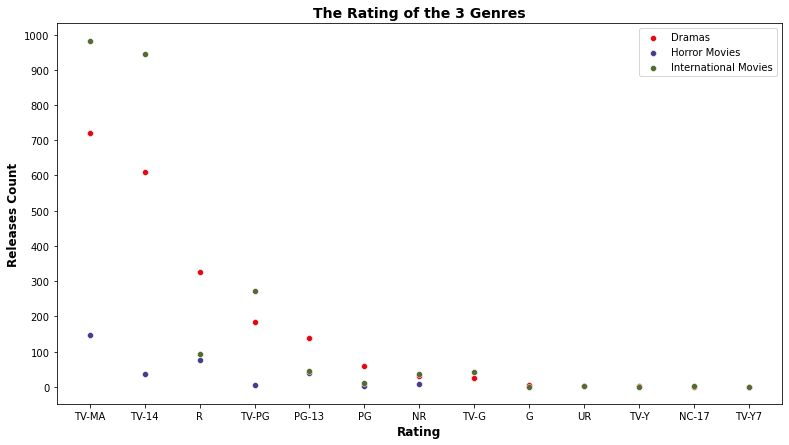

In [14]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.scatterplot(x=dramas['rating'].value_counts().index, y=dramas['rating'].value_counts().values, color='#e50914')
sns.scatterplot(x=horror['rating'].value_counts().index, y=horror['rating'].value_counts().values, color='#483D8B')
sns.scatterplot(x=international['rating'].value_counts().index, y=international['rating'].value_counts().values, color='#556B2F')
ax.set_yticks(np.arange(0, 1100, 100))
plt.title('The Rating of the 3 Genres', fontsize=14, fontweight='bold')
plt.legend(['Dramas','Horror Movies', 'International Movies'])
plt.ylabel('Releases Count', fontsize=12, fontweight='bold')
plt.xlabel('Rating', fontsize=12, fontweight='bold')


**Task3**

In [15]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
movie=data[data['type']=='Movie']
show=data[data['type']=='TV Show']

Text(0.5, 0, 'Year')

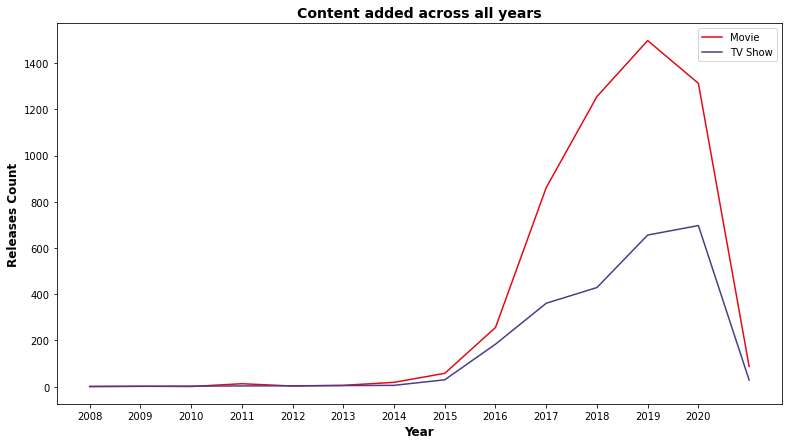

In [16]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(x=movie['year_added'].value_counts().index, y=movie['year_added'].value_counts().values, color='#e50914')
sns.lineplot(x=show['year_added'].value_counts().index, y=show['year_added'].value_counts().values, color='#483D8B')
ax.set_xticks(np.arange(2008, 2021, 1))
plt.title('Content added across all years', fontsize=14, fontweight='bold')
plt.legend(['Movie','TV Show'])
plt.ylabel('Releases Count', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')

**Task4**

In [17]:
countries = data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='country')
n=countries.groupby('country').filter(lambda x: len(x)>200)
n=n[n['country']!='Country Unavailable']
n['country'].value_counts()


United States     3287
India              990
United Kingdom     721
Canada             412
France             349
Japan              285
Spain              215
South Korea        212
Name: country, dtype: int64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

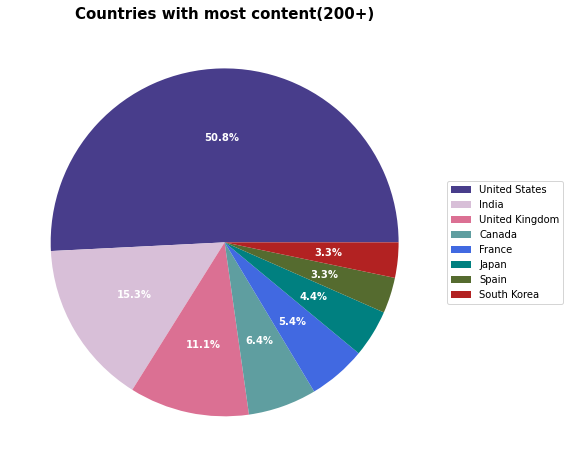

In [18]:
labels=['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea']
plt.figure(figsize=(13,8))
patches, texts, pcts=plt.pie(x=n['country'].value_counts().values, autopct="%.1f%%", 
                             colors=['#483D8B','#D8BFD8', '#DB7093','#5F9EA0','#4169E1', '#008080', '#556B2F', '#B22222'])
plt.title('Countries with most content(200+)',fontsize=15, fontweight='bold')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(pcts, color='white', fontweight='bold')

**Task5**

In [19]:
c = data.set_index('director').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='country')
c=c.set_index('country').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='director')
c=c[c['director']!='No Director']
c


,country,director
1,Mexico,Jorge Michel Grau
2,Singapore,Gilbert Chan
3,United States,Shane Acker
4,United States,Robert Luketic
5,Turkey,Serdar Akar
...,...,...
10491,Netherlands,Josef Fares
10492,India,Mozez Singh
10495,United Kingdom,Sam Dunn
10496,Canada,Sam Dunn


In [20]:
usa = c[c['country']=='United States']
ind = c[c['country']=='India']

Text(0, 0.5, 'Count')

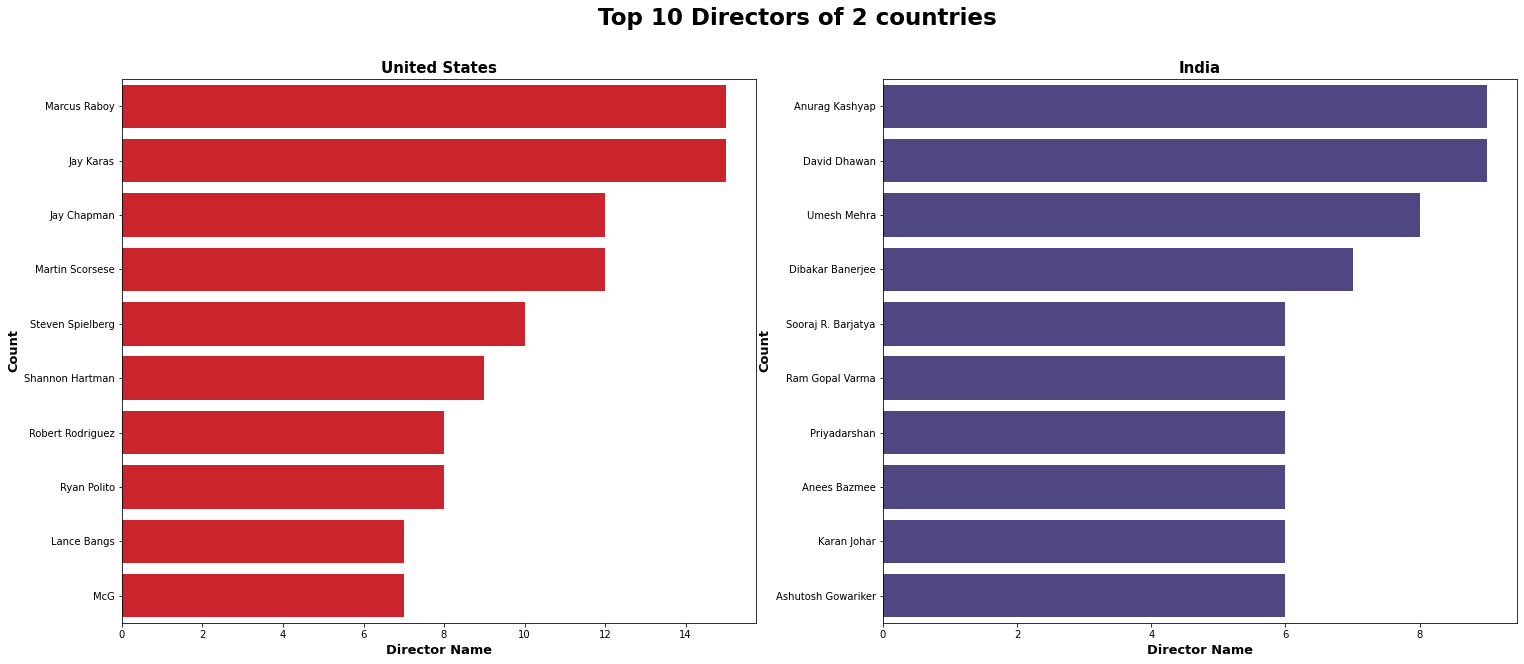

In [21]:
fig, ax =plt.subplots(1,2,figsize=(25, 10))
fig.suptitle('Top 10 Directors of 2 countries', fontsize=23, fontweight="bold")
ax1=sns.barplot(x=usa['director'].value_counts().values[:10],y=usa['director'].value_counts().index[:10], ax=ax[0], 
            color='#e50914')
ax1.set_title('United States', fontsize=15, fontweight="bold")
ax1.set_xlabel('Director Name', fontsize=13, fontweight="bold")
ax1.set_ylabel('Count', fontsize=13, fontweight="bold")
ax2=sns.barplot(x=ind['director'].value_counts().values[:10],y=ind['director'].value_counts().index[:10], ax=ax[1],
           color='#483D8B')
ax2.set_title('India', fontsize=15, fontweight="bold")
ax2.set_xlabel('Director Name', fontsize=13, fontweight="bold")
ax2.set_ylabel('Count', fontsize=13, fontweight="bold")


# Additional plots

**1.What audience Netflix relies on the most?(by most filmed content)**

In [22]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [23]:
data['target_ages'] = data['rating'].replace(ratings_ages)
data['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [24]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,year_added,target_ages
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,2020,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,,2016,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",,2018,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",,2017,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,,2020,Teens


Text(0, 0.5, 'Releases Count')

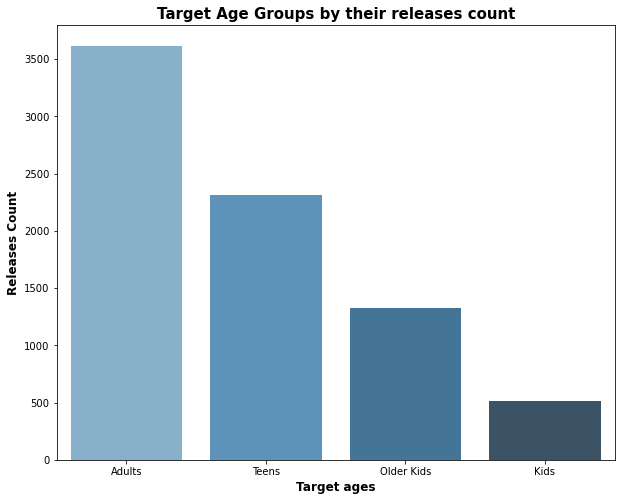

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['target_ages'].value_counts().index, y=data['target_ages'].value_counts().values, palette="Blues_d")
plt.title('Target Age Groups by their releases count',fontsize=15, fontweight='bold')
plt.xlabel('Target ages', fontsize=12, fontweight='bold')
plt.ylabel('Releases Count', fontsize=12, fontweight='bold')

In [26]:
def generate_rating(data):
    rating_data = data.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_data = rating_data[rating_data['show_id'] != 0]
    rating_data.columns = ['rating', 'target_ages', 'counts']
    rating_data = rating_data.sort_values('target_ages')
    return rating_data

In [27]:
rating_data = generate_rating(data)

Text(0, 0.5, 'Releases Count')

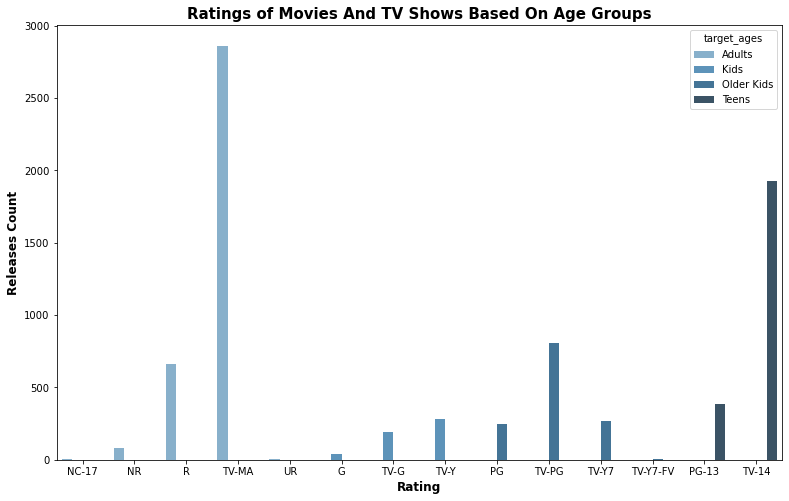

In [28]:
plt.figure(figsize=(13,8))
sns.barplot(data=rating_data, x='rating', y='counts', hue='target_ages', palette="Blues_d")
plt.title('Ratings of Movies And TV Shows Based On Age Groups',fontsize=15, fontweight='bold')
plt.xlabel('Rating', fontsize=12, fontweight='bold')
plt.ylabel('Releases Count', fontsize=12, fontweight='bold')


**2.Which words often used the description of content?(size depends on significance)**

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

(-0.5, 1199.5, 1199.5, -0.5)

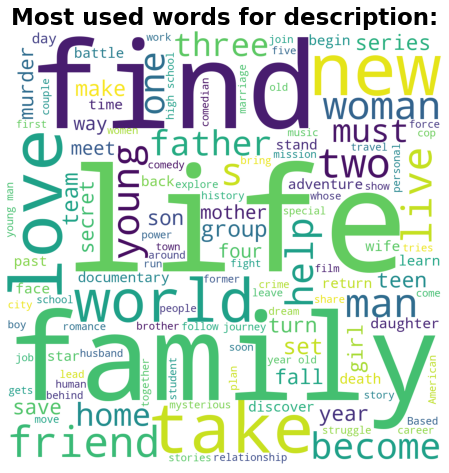

In [30]:
text = ' '.join(data['description'])

plt.rcParams['figure.figsize'] = (10,8)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.title('Most used words for description:',fontsize=23, fontweight='bold')
plt.axis('off')

In [31]:
cast = data.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='cast')
cast=cast[cast['cast']!='No Cast']

Text(0, 0.5, 'Count')

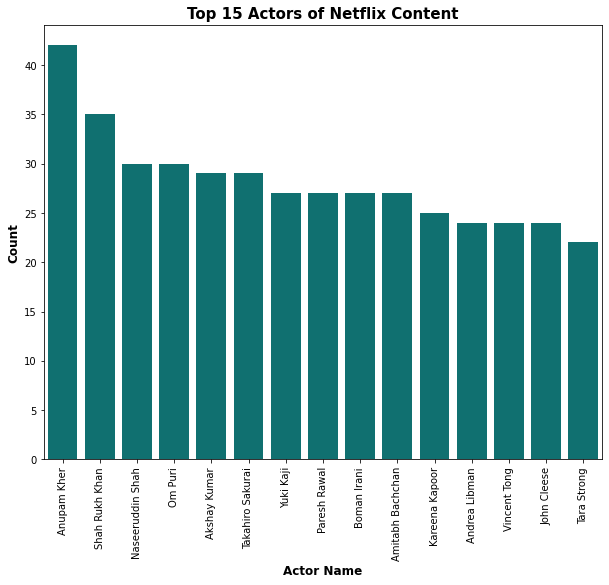

In [32]:
plt.figure(figsize=(10,8))
k=sns.barplot(x=cast['cast'].value_counts().index[:15], y=cast['cast'].value_counts().values[:15], color='#008080')
k.set_xticklabels(k.get_xticklabels(), 
                          rotation=90)
plt.title('Top 15 Actors of Netflix Content',fontsize=15, fontweight='bold')
plt.xlabel('Actor Name', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

<span style="color:black">
    FEEDBACK
<br>
    <span style="color:green"> (10 /10p) <br><span style="color:black">1. Preparing the Dataset 
    <br>
    Good job!
    <br> <br>
    <span style="color:green"> (20 /20p) <br><span style="color:black">2. Manipulating and analyzing the data 
    <br>
    Task 1-5. Good job! 
    <br><br>
    <span style="color:green"> (10 /10p) <br><span style="color:black">3. Presenting the project and answering questions
    <br>
    Good job!
    <br><br>
<span style="color:green">
    Well done!<br>
    FINAL GRADE: 40/40
</span>